In [2]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import KFold
import keras
import scipy.io as sci
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

Mounted at /content/drive


In [5]:
matData = sci.loadmat('/content/drive/My Drive/proj503_final.mat')

In [6]:
df = pd.DataFrame({'X': matData['sailing_data'][0], 'Y': matData['sailing_data'][0]})

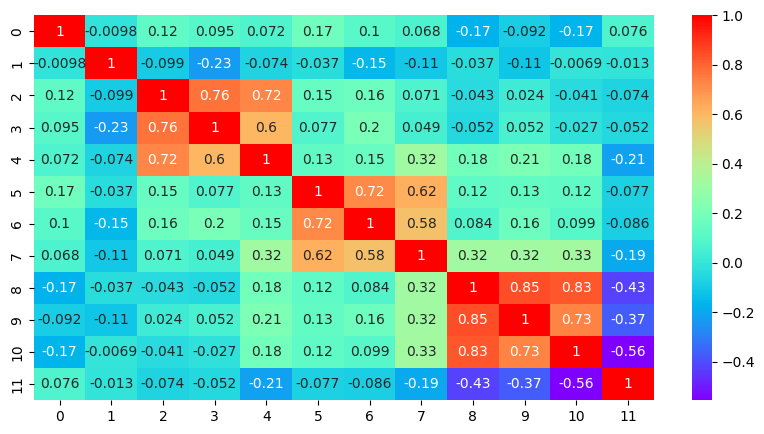

In [17]:
plt.figure(figsize = (10,5))
inp = df.X[0]
inp = np.append(inp,df.Y[1],axis = 1)
ddd=pd.DataFrame(inp)

sns.heatmap(ddd.corr(),annot = True, cmap = 'rainbow')
plt.show()


In [ ]:
error = np.array([])
rmse = np.array([])
for t in range(1,265):
  X_train,Y_train = [],[]
  # LOOCV
  train_subjects = [i for i in range(1,265) if i!=t]
  for j in train_subjects:
    X_train = np.append(X_train,df.X[0][j-1].T,axis = 0)
    Y_train = np.append(Y_train,df.Y[1][j-1].T,axis = 0)
  X_test = df.X[0][t-1].T
  Y_test = df.Y[1][t-1].T

  X_train = X_train.reshape(263,11)
  Y_train = Y_train.reshape(263,1)
  X_test = X_test.reshape(1,11)
  Y_test = Y_test.reshape(1,1)
  clf = LinearDiscriminantAnalysis(solver = 'lsqr').fit(X_train,Y_train)
  Y_predicted = clf.predict(X_test)
  print('Iteration:',t)
  print( np.mean(Y_test - Y_predicted))
  error = np.append(error,[np.mean(Y_test-Y_predicted)],axis = 0)
  rmse = np.append(rmse,[np.sqrt(np.mean((Y_test-Y_predicted)**2))],axis = 0)


In [21]:
sum(error)

-9.0

In [9]:
import statistics

In [10]:
#Tuning Hyperparameters
parameters = df.X[0]
target = df.Y[1]
x_train, x_test, y_train, y_test = train_test_split(parameters, target, test_size=0.2)
mean_vector = []
variance_vec = []
for i in range(1,12):
  mean_vector = np.append(mean_vector,[statistics.mean(x_train[:,i-1])],axis = 0)
  variance_vec = np.append(variance_vec,[statistics.variance(x_train[:,i-1])],axis = 0)
  x_train[:,i-1] = (x_train[:,i-1]-(mean_vector[i-1]))/variance_vec[i-1]
  x_test[:,i-1]  =  (x_test[:,i-1]-(mean_vector[i-1]))/variance_vec[i-1]


In [ ]:
reg_models = [LogisticRegression(penalty = 'l2',random_state = 0,solver = 'liblinear'),LogisticRegression(penalty = 'l2',random_state = 0,solver = 'lbfgs'),LogisticRegression(penalty = 'l2',random_state = 0,solver = 'sag'),
             LogisticRegression(penalty = 'l1',random_state = 0,solver = 'liblinear'),LogisticRegression(penalty = 'none',random_state = 0,solver = 'lbfgs'),LogisticRegression(penalty = 'none',random_state = 0,solver = 'sag'),
             LogisticRegression(penalty = 'l2',random_state = 0,solver = 'liblinear',C = 0.001),LogisticRegression(penalty = 'l2',random_state = 0,solver = 'lbfgs',C = 0.001),LogisticRegression(penalty = 'l2',random_state = 0,solver = 'sag',C = 0.001),
             LogisticRegression(penalty = 'l1',random_state = 0,solver = 'liblinear',C = 0.001),LogisticRegression(penalty = 'none',random_state = 0,solver = 'lbfgs',C = 0.001),LogisticRegression(penalty = 'none',random_state = 0,solver = 'sag',C = 0.001),
             LogisticRegression(penalty = 'l2',random_state = 0,solver = 'liblinear',C = 0.01),LogisticRegression(penalty = 'l2',random_state = 0,solver = 'lbfgs',C = 0.01),LogisticRegression(penalty = 'l2',random_state = 0,solver = 'sag',C = 0.01),
             LogisticRegression(penalty = 'l1',random_state = 0,solver = 'liblinear',C = 0.01),LogisticRegression(penalty = 'none',random_state = 0,solver = 'lbfgs',C = 0.01),LogisticRegression(penalty = 'none',random_state = 0,solver = 'sag',C = 0.01),LogisticRegression(penalty = 'l2',random_state = 0,solver = 'liblinear',C = 0.1),LogisticRegression(penalty = 'l2',random_state = 0,solver = 'lbfgs',C = 0.1),LogisticRegression(penalty = 'l2',random_state = 0,solver = 'sag',C = 0.1),
             LogisticRegression(penalty = 'l1',random_state = 0,solver = 'liblinear',C = 0.1),LogisticRegression(penalty = 'none',random_state = 0,solver = 'lbfgs',C = 0.1),LogisticRegression(penalty = 'none',random_state = 0,solver = 'sag',C = 0.1)]

In [ ]:
from prettytable import PrettyTable


In [ ]:
hyperparameter_score_list_1 = []
i = 0
for clf in reg_models:
  i = i+1
  scores = cross_validate(clf, x_train, y_train, cv=10, scoring='accuracy')
  mean_score = np.mean(scores['test_score'])
  hyperparameter_score_list_1.append([i, mean_score])

In [ ]:
myTable = PrettyTable(["model", "Avg accuracy"])
for row in hyperparameter_score_list_1:
    myTable.add_row([row[0], round(row[1],3)])
print(myTable)

+-------+--------------+
| model | Avg accuracy |
+-------+--------------+
|   1   |    0.929     |
|   2   |    0.939     |
|   3   |    0.929     |
|   4   |    0.929     |
|   5   |    0.918     |
|   6   |    0.929     |
|   7   |     0.94     |
|   8   |     0.94     |
|   9   |     0.94     |
|   10  |     0.94     |
|   11  |    0.918     |
|   12  |    0.929     |
|   13  |     0.94     |
|   14  |     0.94     |
|   15  |     0.94     |
|   16  |     0.94     |
|   17  |    0.918     |
|   18  |    0.929     |
|   19  |     0.94     |
|   20  |    0.939     |
|   21  |     0.94     |
|   22  |     0.94     |
|   23  |    0.918     |
|   24  |    0.929     |
+-------+--------------+


In [ ]:
hyperparameter_score_list_2 = []
i = 0
for clf in reg_models:
  i = i+1
  scores = cross_validate(clf, x_train, y_train, cv=10, scoring='neg_log_loss')
  mean_score = np.mean(scores['test_score'])
  hyperparameter_score_list_2.append([i, mean_score])

In [ ]:
myTable2 = PrettyTable(["model", "Avg neg_log_loss"])
for row in hyperparameter_score_list_2:
    myTable2.add_row([row[0], round(row[1],3)])
print(myTable2)

In [ ]:
hyperparameter_score_list_3 = []
i = 0
for clf in reg_models:
  i = i+1
  scores = cross_validate(clf, x_train, y_train, cv=10, scoring='f1')
  mean_score = np.mean(scores['test_score'])
  hyperparameter_score_list_3.append([i, mean_score])

In [ ]:
myTable3 = PrettyTable(["model", "Avg f1_score"])
for row in hyperparameter_score_list_3:
    myTable3.add_row([row[0], round(row[1],3)])
print(myTable3)

In [ ]:
hyperparameter_score_list_4 = []
i = 0
for clf in reg_models:
  i = i+1
  scores = cross_validate(clf, x_train, y_train, cv=10, scoring='recall')
  mean_score = np.mean(scores['test_score'])
  hyperparameter_score_list_4.append([i, mean_score])

In [ ]:
myTable4 = PrettyTable(["model", "recall"])
for row in hyperparameter_score_list_4:
    myTable4.add_row([row[0], round(row[1],3)])
print(myTable4)

In [ ]:
hyperparameter_score_list_5 = []
i = 0
for clf in reg_models:
  i = i+1
  scores = cross_validate(clf, x_train, y_train, cv=10, scoring='precision')
  mean_score = np.mean(scores['test_score'])
  hyperparameter_score_list_5.append([i, mean_score])

In [ ]:
myTable5 = PrettyTable(["model", "precision"])
for row in hyperparameter_score_list_5:
    myTable5.add_row([row[0], round(row[1],3)])
print(myTable5)

In [1]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve

In [ ]:
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in reg_models:

    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1

clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
print(clf_compare)

In [ ]:
parameters = {
    'solver': ['svd', 'lsqr','eigen'],
    'shrinkage': [None] + [x / 10 for x in range(0, 6)] + ['auto'],
    'n_components': [None] + [1, 2, 5,9,12,25,33]
    }

grid = GridSearchCV(LinearDiscriminantAnalysis(),parameters, cv=5,verbose=3, refit = True)
grid.fit(x_train, y_train)


In [38]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'n_components': None, 'shrinkage': 0.1, 'solver': 'lsqr'}
LinearDiscriminantAnalysis(shrinkage=0.1, solver='lsqr')


In [11]:
from sklearn.metrics import classification_report, confusion_matrix


In [12]:
clf = LinearDiscriminantAnalysis(solver = 'lsqr', shrinkage = 0.1).fit(x_train,y_train)
predictions=clf.predict(x_test)
print(predictions)
print(y_test.T)
print(classification_report(y_test, predictions))
print(clf.coef_)
print(confusion_matrix(y_test,predictions))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.00      0.00      0.00         1

    accuracy                           0.92        53
   macro avg       0.49      0.47      0.48        53
weighted avg       0.96      0.92      0.94        53

[[ 0.00000000e+00  1.95586837e-03  5.44607278e-03 -3.29597460e-17
  -1.04083409e-17  1.94362329e-03  0.00000000e+00  0.00000000e+00
   1.52038885e-02  0.00000000e+00  0.00000000e+00]]
[[49  3]
 [ 1  0]]
